In [1]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors 
import math
import pandas as pd

Welcome to JupyROOT 6.30/04


In [2]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [3]:
def ReadNuclearModelSamples(IsBDM, massANDboost=None):
    if IsBDM:
        fBDM_00a = ROOT.TFile.Open("/home/leoperes/ntuples_grid_newVertex/00a_newVertex/bdm_"+massANDboost+"_00a.root")
        if massANDboost != 'm20_b10':
            fBDM_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/bdm_'+massANDboost+'_01a.root')
        fBDM_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/bdm_'+massANDboost+'_02a.root')
        fBDM_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/bdm_'+massANDboost+'_00b.root')
        fBDM_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/bdm_'+massANDboost+'_01b.root')
        fBDM_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/bdm_'+massANDboost+'_02b.root')
        if massANDboost != 'm20_b10':
            samples = [fBDM_00a, fBDM_01a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        else:
            samples = [fBDM_00a, fBDM_02a, fBDM_00b, fBDM_01b, fBDM_02b]
        return samples
    if not IsBDM:
        fAtm_00a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
        fAtm_01a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01a_newVertex/atm_hA_LFG.root')
        fAtm_02a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02a_newVertex/atm_hA_ESF.root')
        fAtm_00b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00b_newVertex/atm_hN_BR.root')
        fAtm_01b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/01b_newVertex/atm_hN_LFG.root')
        fAtm_02b = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/02b_newVertex/atm_hN_ESF.root')
        samples = [fAtm_00a, fAtm_01a, fAtm_02a, fAtm_00b, fAtm_01b, fAtm_02b]
        return samples

In [4]:
listsamples = ['m05_b1p1', 'm05_b1p5', 'm05_b10', 'm10_b1p1', 'm10_b1p5', 'm10_b10', 'm20_b1p1', 'm20_b1p5', 'm20_b10', 'm40_b1p1', 'm40_b1p5', 'm40_b10']
list_samples_latex = [r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 5 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 10 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 20 \text{ GeV}, \; \gamma=10$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.1$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=1.5$', r'$m_\chi = 40 \text{ GeV}, \; \gamma=10$' ]
list_nuclearmodels = ['hA_BR','hA_LSF', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [5]:
def vec_mod(arr):
    return math.sqrt(arr[0]**2+arr[1]**2+arr[2]**2)

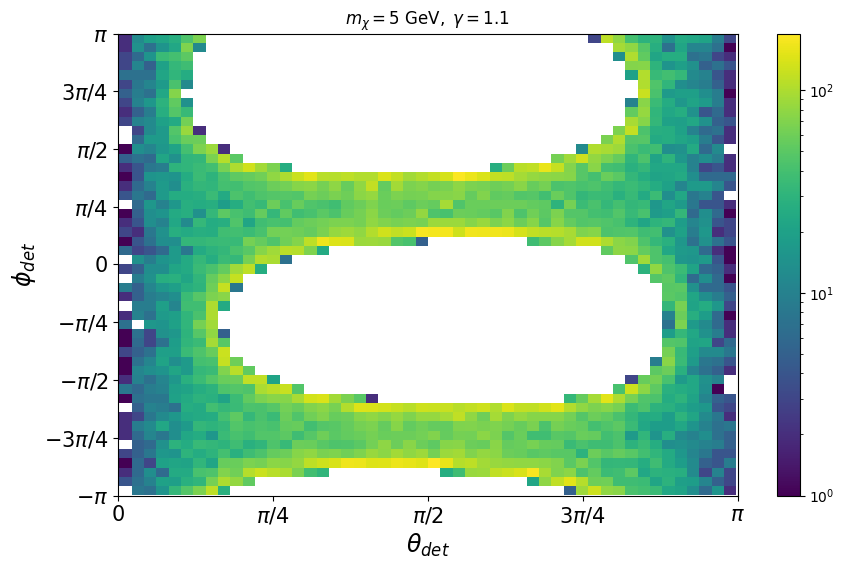

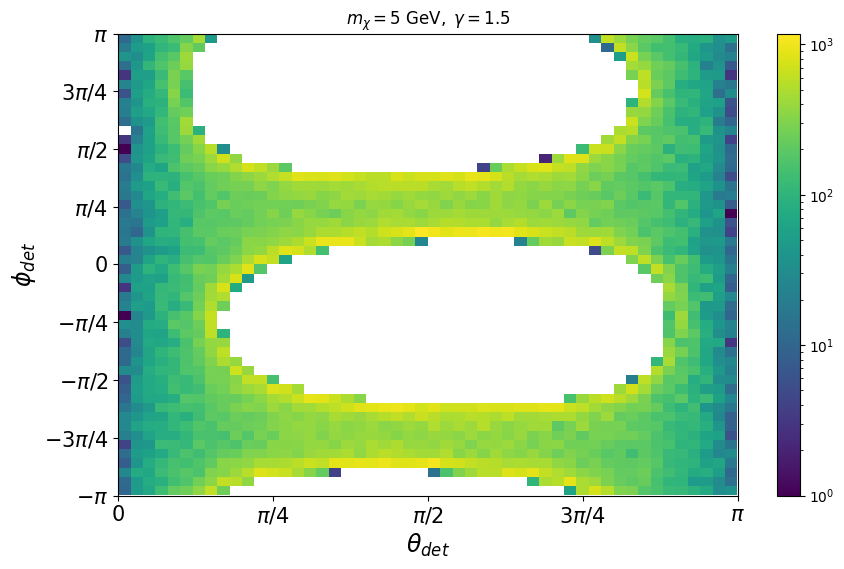

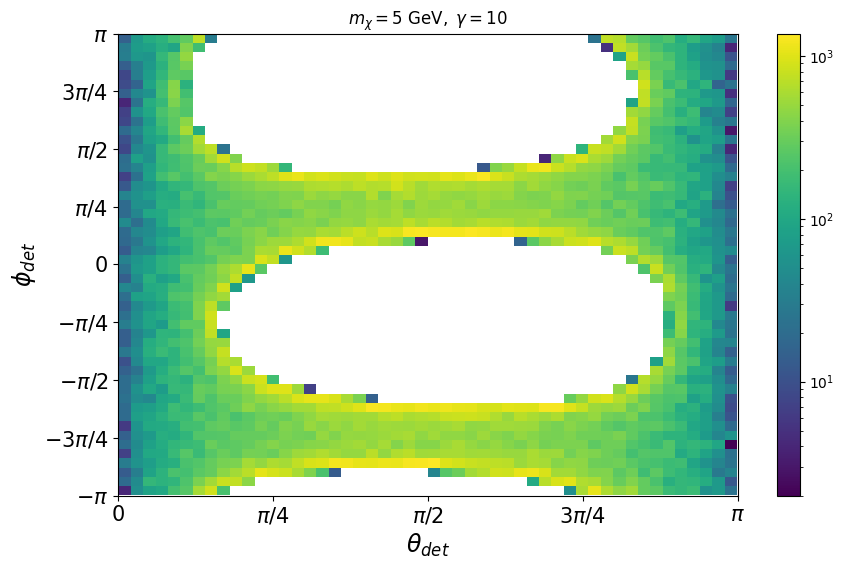

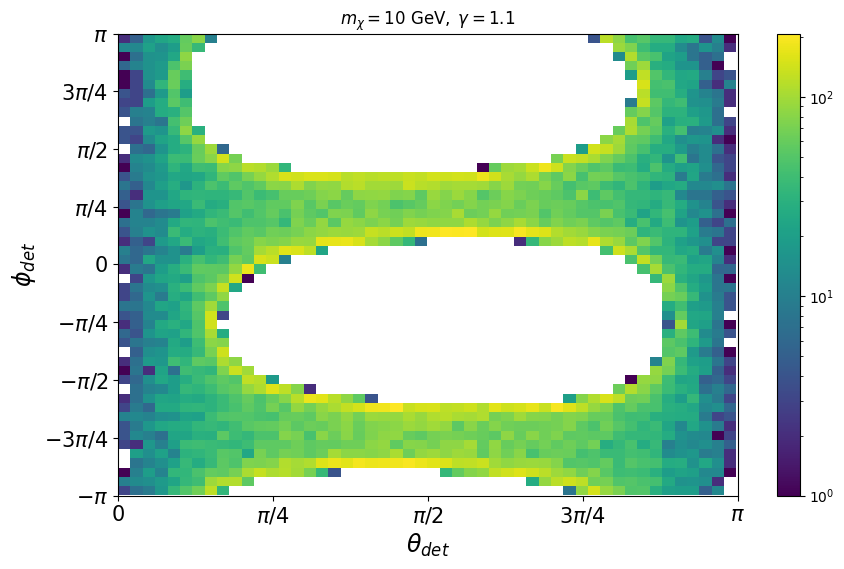

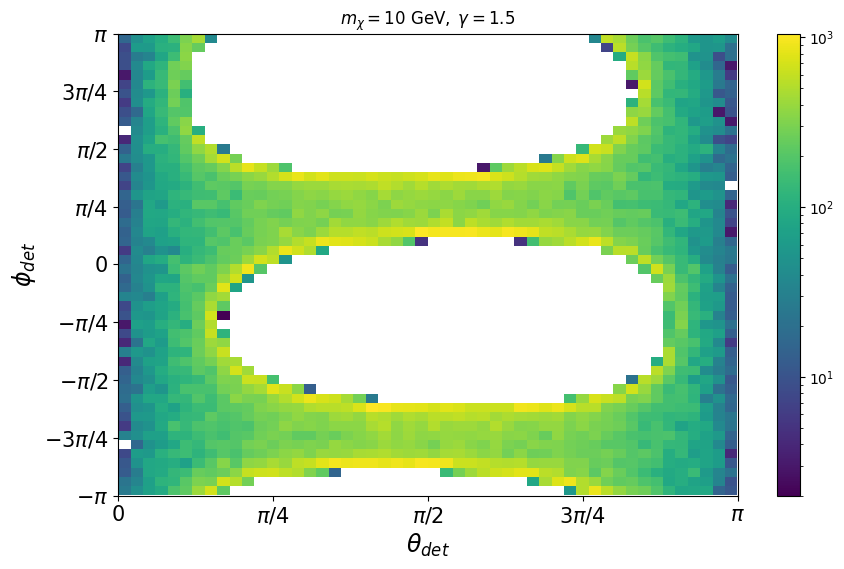

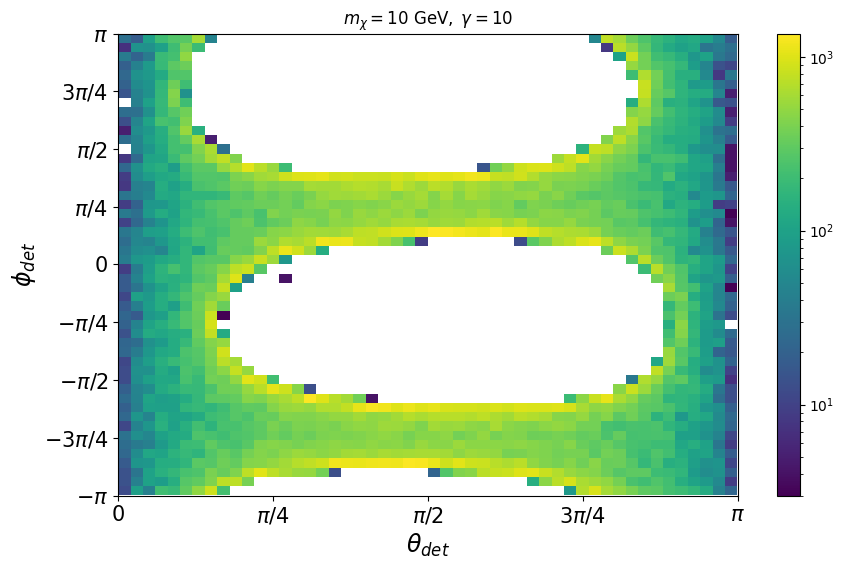

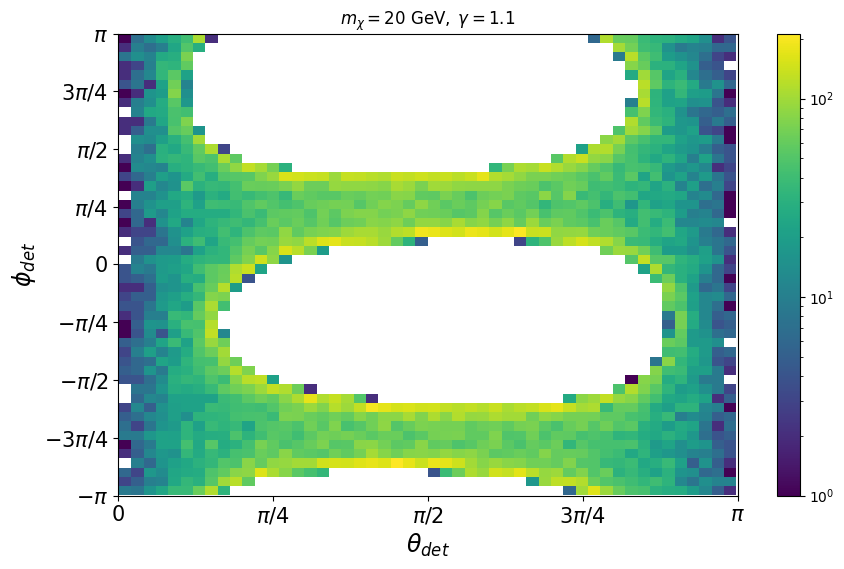

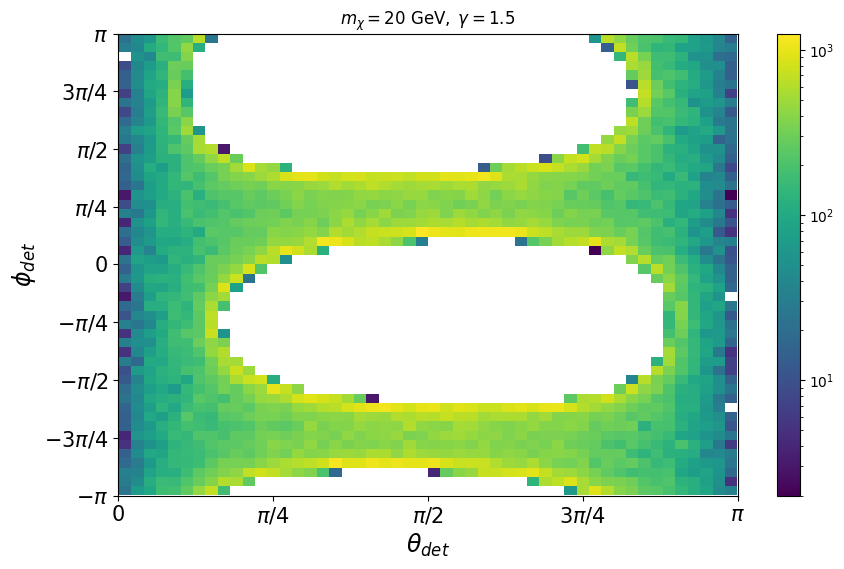

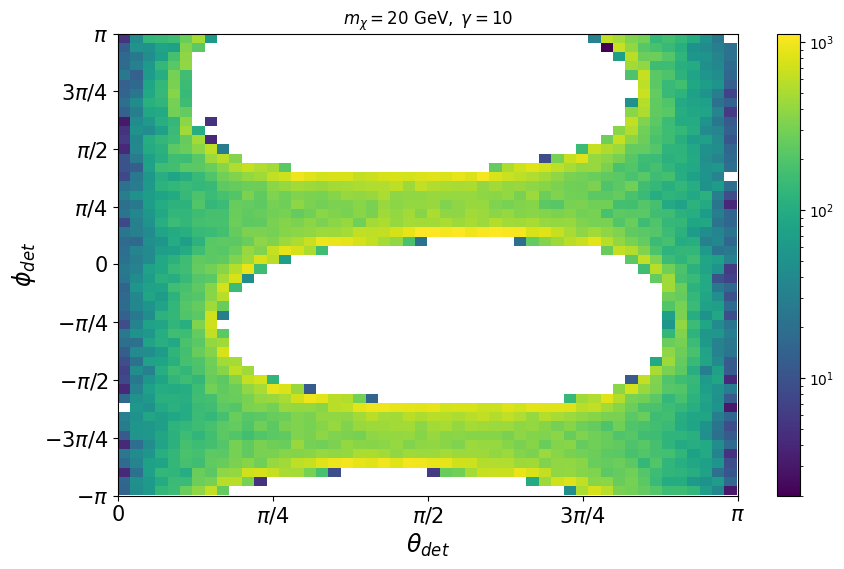

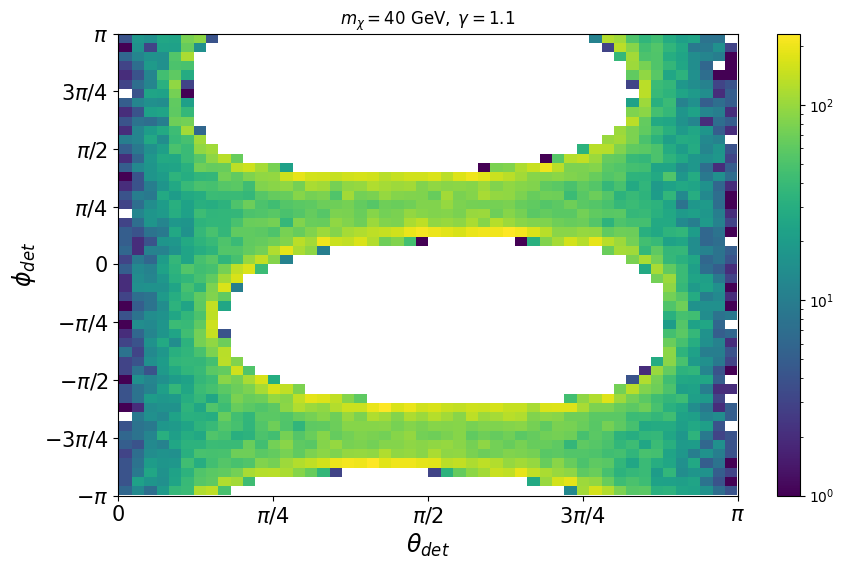

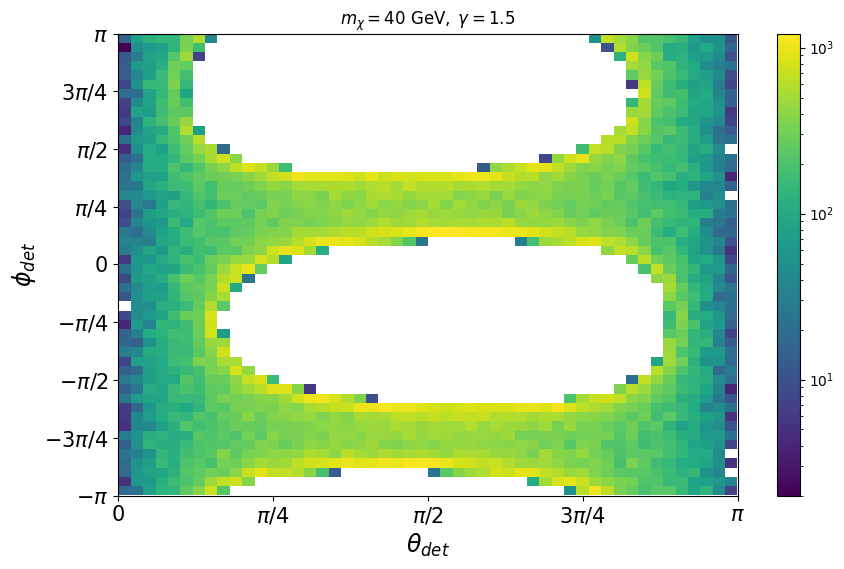

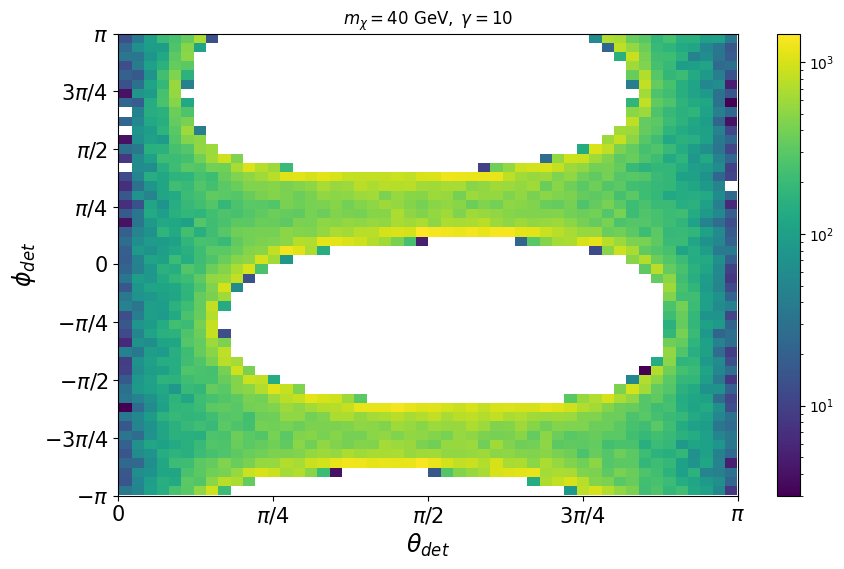

In [6]:
for SAMPLE_INDEX in range(0,12):
    infiles_list = ReadNuclearModelSamples(True, listsamples[SAMPLE_INDEX])
    intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
    intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
    reco_entries = [intree().GetEntries() for intree in intrees_reco]
    
    MCNuMomentum = [GetNpArraysFromTrees2(func(),"MCNuMomentum") for func in intrees_reco]
    NuMom_True = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCNuMomentum)]
    NuMom_True_Unit = [[evt/vec_mod(evt) for evt in nuclearmodel] for nuclearmodel in NuMom_True]
    plot_dirdetc_nu = []
    Phi_Theta_NuMom_Unit = [[plot_dirdetc_nu.append((math.atan2(nu[1], nu[0]), math.acos(nu[2]))) for nu in nuclearmodel] for nuclearmodel in NuMom_True_Unit]
    plot_dirdetc_nu = np.array(plot_dirdetc_nu)
    
    fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

    h = ax.hist2d(plot_dirdetc_nu[:,1],plot_dirdetc_nu[:,0], bins = (50,50),  norm = colors.LogNorm(), label = ' # Events')
    ax.set_xlabel(r'$\theta_{det}$', fontsize = 17)
    ax.set_ylabel(r'$\phi_{det}$', fontsize = 17)
    ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
    ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
    ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    fig.colorbar(h[3], ax=ax)
    plt.title(list_samples_latex[SAMPLE_INDEX])
    plt.savefig('DirectionDetector_'+listsamples[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
    plt.show()
    
    

    
    #print(len(NuMom_True),SAMPLE_INDEX)

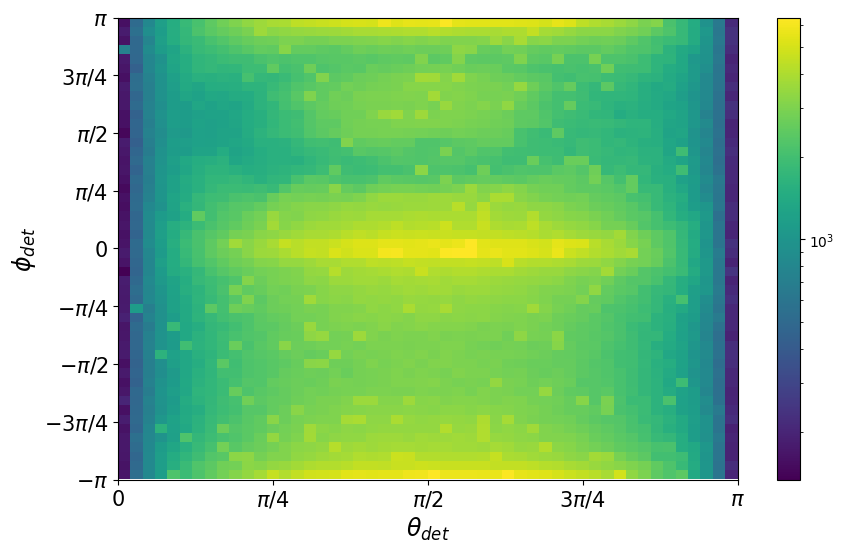

In [8]:

infiles_list = ReadNuclearModelSamples(False)
intrees_reco = [lambda arg=infile: arg.Get("ana/Atm") for infile in infiles_list]
intrees_simu = [lambda arg=infile: arg.Get("ana/AllEvents") for infile in infiles_list]
reco_entries = [intree().GetEntries() for intree in intrees_reco]
    
MCNuMomentum = [GetNpArraysFromTrees2(func(),"MCNuMomentum") for func in intrees_reco]
NuMom_True = [nuclearmodel.reshape(reco_entries[i_sample],3) for i_sample, nuclearmodel in enumerate(MCNuMomentum)]
NuMom_True_Unit = [[evt/vec_mod(evt) for evt in nuclearmodel] for nuclearmodel in NuMom_True]
plot_dirdetc_nu = []
Phi_Theta_NuMom_Unit = [[plot_dirdetc_nu.append((math.atan2(nu[1], nu[0]), math.acos(nu[2]))) for nu in nuclearmodel] for nuclearmodel in NuMom_True_Unit]
plot_dirdetc_nu = np.array(plot_dirdetc_nu)
    
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(plot_dirdetc_nu[:,1],plot_dirdetc_nu[:,0], bins = (50,50),  norm = colors.LogNorm(), label = ' # Events')
ax.set_xlabel(r'$\theta_{det}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{det}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
#plt.savefig('DirectionDetector_Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
plt.show()

h = ax.hist(plot_dirdetc_nu[:,1], bins = 50, label = ' # Events')
ax.set_xlabel(r'$\theta_{det}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#ig.colorbar(h[3], ax=ax)
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
#plt.savefig('DirectionDetector_Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
plt.show()
    
    

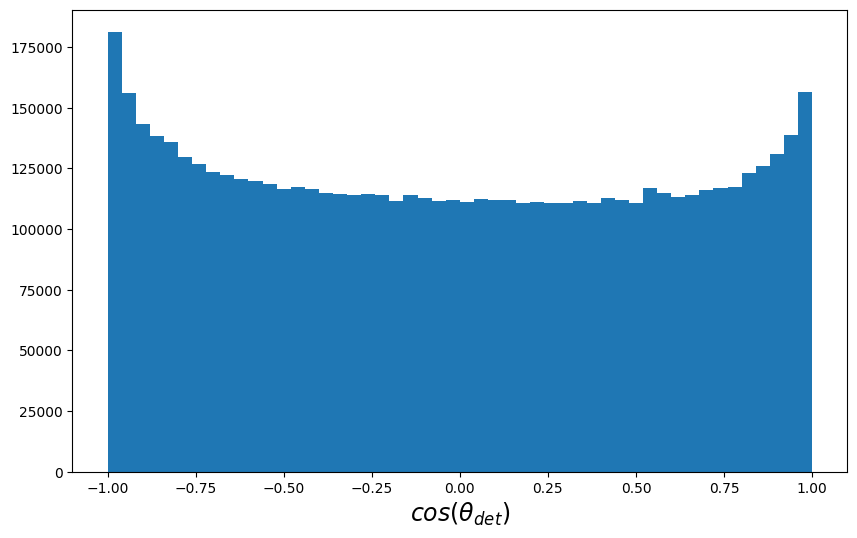

In [9]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(np.cos(plot_dirdetc_nu[:,1]), bins = 50, label = ' # Events')
ax.set_xlabel(r'$cos(\theta_{det})$', fontsize = 17)
#ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
#ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
#plt.savefig('DirectionDetector_Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
plt.show()

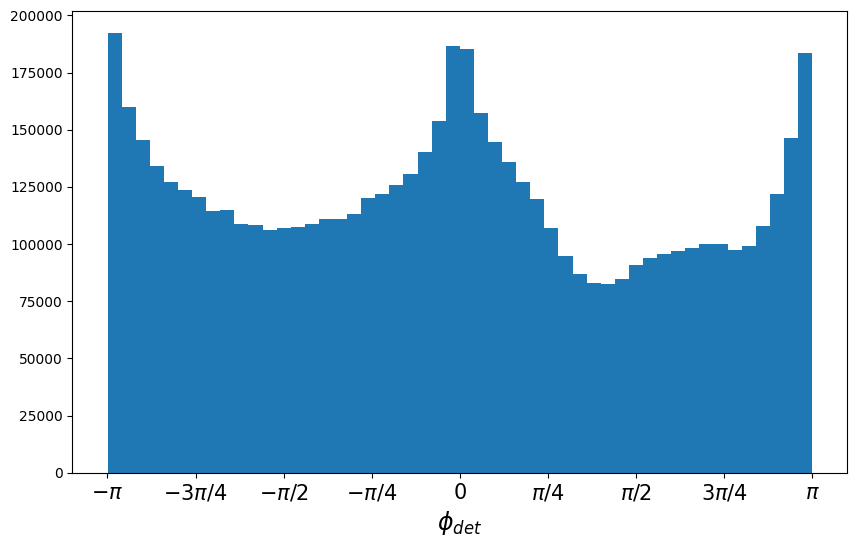

In [10]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(plot_dirdetc_nu[:,0], bins = 50, label = ' # Events')
ax.set_xlabel(r'$\phi_{det}$', fontsize = 17)
ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
#plt.savefig('DirectionDetector_Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX]+'.pdf', format='pdf', dpi=300)
plt.show()

In [6]:
Sun_Positions = np.loadtxt('../newSyst/background_sun_pos.dat', delimiter='\t', usecols=(0,1,2))

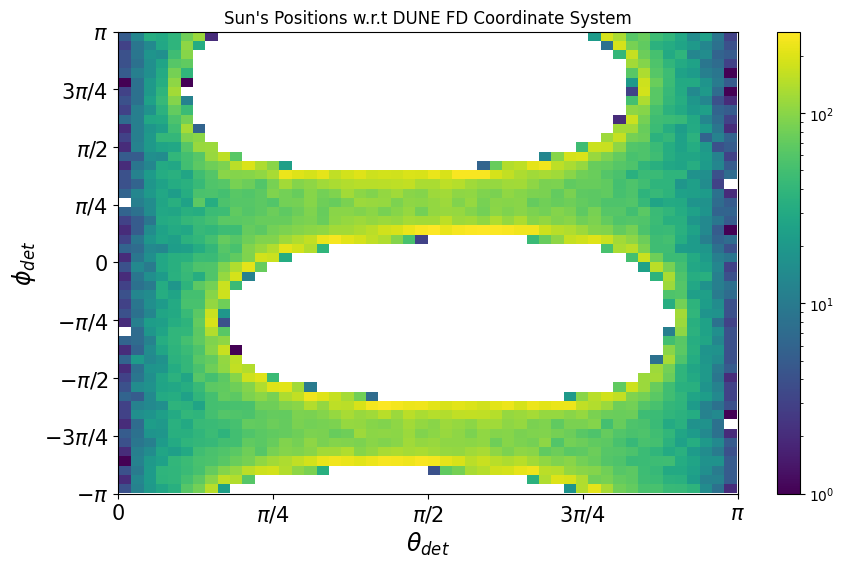

In [7]:
PlotSunDirection = []
Phi_Theta_NuMom_Unit = [PlotSunDirection.append((math.atan2(SunPos[1], SunPos[0]), math.acos(SunPos[2]))) for SunPos in Sun_Positions] 

fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
PlotSunDirection = np.array(PlotSunDirection)
h = ax.hist2d(PlotSunDirection[:,1],PlotSunDirection[:,0], bins = (50,50),  norm = colors.LogNorm(), label = ' # Events')
ax.set_xlabel(r'$\theta_{det}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{det}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
plt.title("Sun's Positions w.r.t DUNE FD Coordinate System")
plt.savefig('SunPositions_.pdf', format='pdf', dpi=300)
plt.show()


In [8]:
fAtm = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
fTree_atm = fAtm.Get("ana/Atm")
fTree_atm_All = fAtm.Get("ana/AllEvents")
nSimulatedEvtsReco_atm = fTree_atm.GetEntries()
nSimulatedEvtsAll_atm = fTree_atm_All.GetEntries()

MCPartGenMomentum_AllSimu = GetNpArraysFromTrees2(fTree_atm_All," MCNuMomentum")
TrueEnergy_AllEvents = np.reshape(MCPartGenMomentum_AllSimu, (nSimulatedEvtsAll_atm, 3))
NuAtm_True_Unit = [evt/vec_mod(evt) for evt in TrueEnergy_AllEvents]

In [9]:
NuAtm_True_Unit = np.array(NuAtm_True_Unit)
print(NuAtm_True_Unit)

[[-0.19927153 -0.79795842  0.56881739]
 [-0.76570603 -0.42060699  0.48660459]
 [-0.40923242 -0.31023829 -0.8580682 ]
 ...
 [ 0.35553156 -0.89769032  0.26028715]
 [ 0.50697591 -0.21088248 -0.83576552]
 [ 0.82923114  0.16314839 -0.53456368]]


In [26]:
hist_cos = []
for index, atmevt in enumerate(NuAtm_True_Unit):
    indices = np.random.randint(0, len(Sun_Positions), size=1)
    # Use the sampled indices to select elements from the array
    sample_sunpos = Sun_Positions[indices]

    for sunpos in sample_sunpos:
        hist_cos.append(np.arccos(np.sum(atmevt*sunpos)))

    if index > 200000:
        break
        

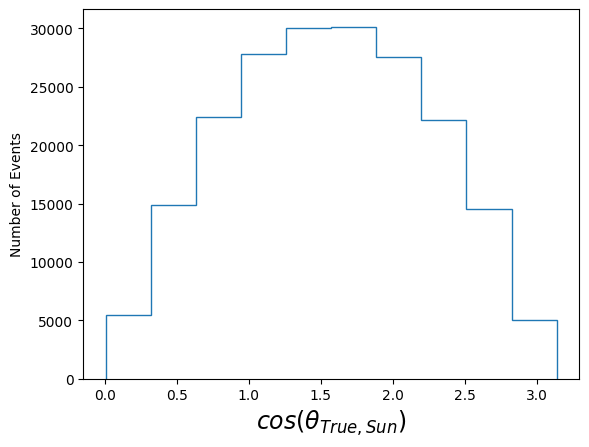

In [27]:
plt.figure(dpi=100)
plt.hist(hist_cos, bins = 10,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{True, Sun})$',fontsize = 17)
plt.show()

In [12]:
fAtm_00a = ROOT.TFile.Open('/home/leoperes/ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')
fTree_atm = fAtm.Get("ana/Atm")
TotalMomRecoRangeUnitVect_Reco = GetNpArraysFromTrees2(fTree_atm," TotalMomRecoRangeUnitVect")
nSimulatedEvtsReco_atm = fTree_atm.GetEntries()

In [13]:
Reco_mom_Nu = np.reshape(TotalMomRecoRangeUnitVect_Reco, (nSimulatedEvtsReco_atm,3))

In [14]:
print(nSimulatedEvtsReco_atm)

220573


In [28]:
hist_cos_reco = []
for index, atmevt in enumerate(Reco_mom_Nu):
    indices = np.random.randint(0, len(Sun_Positions), size=10)
    # Use the sampled indices to select elements from the array
    sample_sunpos = Sun_Positions[indices]

    for sunpos in sample_sunpos:
        hist_cos_reco.append(np.sum(atmevt*sunpos))

    if index > 100000:
        break
        

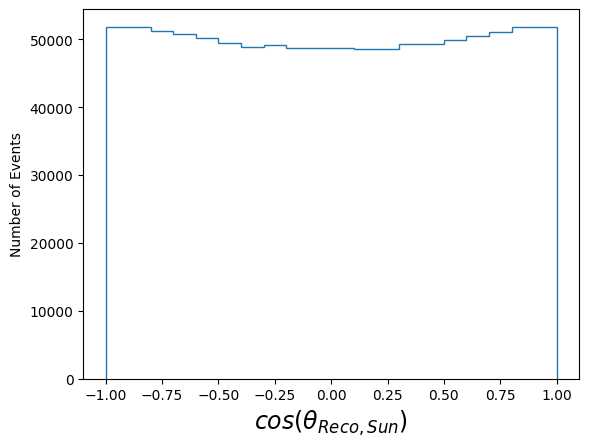

In [32]:
plt.figure(dpi=100)
plt.hist(hist_cos_reco, bins = 20,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Reco, Sun})$',fontsize = 17)
plt.show()

/tmp/ipykernel_6478/1603839674.py:2: RuntimeWarning: invalid value encountered in arccos
  plt.hist(np.arccos(np.array(hist_cos_reco)), bins = 20,histtype = 'step')


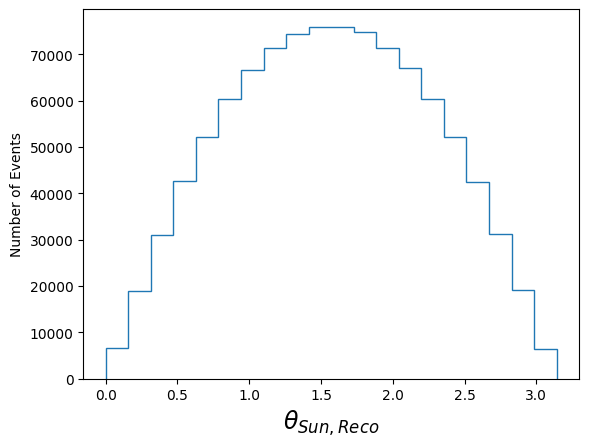

In [37]:
plt.figure(dpi=100)
plt.hist(np.arccos(np.array(hist_cos_reco)), bins = 20,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$\theta_{Sun, Reco}$',fontsize = 17)
plt.show()

In [43]:
print(np.array(hist_cos_reco).size)

1000020


In [44]:
print(np.arccos(np.array(hist_cos_reco)).size)

1000020


/tmp/ipykernel_6478/3295275584.py:1: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(np.array(hist_cos_reco)).size)


In [53]:
CosSun_Atm = 2*math.pi*np.random.random_sample((nSimulatedEvtsReco_atm,))

In [50]:
nSimulatedEvtsReco_atm

220573

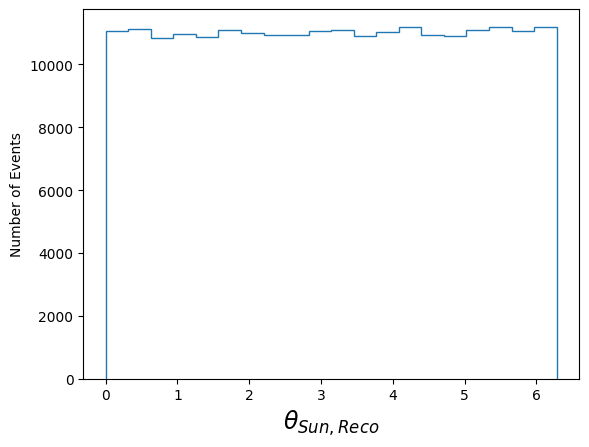

In [54]:
plt.figure(dpi=100)
plt.hist(CosSun_Atm, bins = 20,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$\theta_{Sun, Reco}$',fontsize = 17)
plt.show()

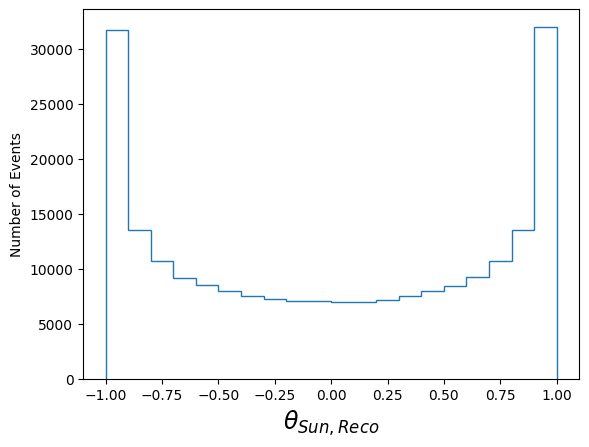

In [55]:
plt.figure(dpi=100)
plt.hist(np.cos(CosSun_Atm), bins = 20,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$\theta_{Sun, Reco}$',fontsize = 17)
plt.show()

In [ ]:
### Simulates with Honda_Phi uniformally distributed ###

